<a href="https://colab.research.google.com/github/OTTO-28/Employee-Attrition/blob/main/employee_attrition_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Prediction


This project was a part of IIT Guwahati's Summer Analytics program which concluded on June 25, 2020. Apart from learning a about Meachine Learning and some Deep Learning, I learnt about procrastination.

You see, I have been meaning to put up this project since a month. But as Mark Twain said -
    'Never put off till tomorrow what may be done day after tomorrow just as well.'
and I followed it.
Until today, when I wresteled myself to finalise this project. 

Well enought of digression and let's dive into the project.

The aim of this project is to predict Employee Attrition given some attributes (duh!). For the uninitiated, employee attrition is 'the natural process by which employees leave the workforce for example, through resignation for personal reasons or retirement and are not immediately replaced.'

Before looking into the data, I've imported some libraries, which will be helpful for the exploration.

<hr>


## Importing Required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None) #This displays all the columns instead of the default 20 

## Importing Dataset

I have uploaded the train and test datasets on Github. The target variable is separated from the train set.

In [7]:
# train.csv contains the predictor variables and target variable, Attrition 
train_df = pd.read_csv('https://raw.githubusercontent.com/OTTO-28/Employee-Attrition/main/train.csv')

train_df.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


Checking the number of rows and columns

In [8]:
train_df.shape

(1628, 29)

<hr>

## EDA and Feature Engineering

Let's look at the datatypes of the various attributes.

In [9]:
train_df.dtypes.sort_values()

Id                          int64
YearsWithCurrManager        int64
YearsSinceLastPromotion     int64
YearsInCurrentRole          int64
YearsAtCompany              int64
TrainingTimesLastYear       int64
TotalWorkingYears           int64
StockOptionLevel            int64
PerformanceRating           int64
PercentSalaryHike           int64
NumCompaniesWorked          int64
MonthlyIncome               int64
CommunicationSkill          int64
Behaviour                   int64
JobInvolvement              int64
EnvironmentSatisfaction     int64
EmployeeNumber              int64
Education                   int64
DistanceFromHome            int64
Attrition                   int64
Age                         int64
JobSatisfaction             int64
JobRole                    object
Gender                     object
OverTime                   object
EducationField             object
Department                 object
BusinessTravel             object
MaritalStatus              object
dtype: object

7 out of 29 attributes are 'object' type. We need to convert them to integer type to feed in our ML algos.

<hr>

### Data Description

A descriiption of the 'int' and 'object' type of attributes 

In [10]:
train_df.describe(include = 'int').T

,count,mean,std,min,25%,50%,75%,max
Id,1628.0,814.500000,470.107435,1.0,407.75,814.5,1221.25,1628.0
Age,1628.0,35.645577,9.481794,18.0,29.00,34.0,42.00,60.0
Attrition,1628.0,0.482187,0.499836,0.0,0.00,0.0,1.00,1.0
DistanceFromHome,1628.0,9.735258,8.306546,1.0,2.00,8.0,15.00,29.0
Education,1628.0,2.884521,1.020470,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1628.0,1000.985872,585.417694,1.0,509.25,977.0,1494.00,2068.0
EnvironmentSatisfaction,1628.0,2.646192,1.125283,1.0,2.00,3.0,4.00,4.0
JobInvolvement,1628.0,2.650491,0.736330,1.0,2.00,3.0,3.00,4.0
JobSatisfaction,1628.0,2.639435,1.096272,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1628.0,5785.524570,4339.293147,1009.0,2625.00,4304.0,7124.25,19999.0


In [11]:
train_df.describe(include = 'object').T

,count,unique,top,freq
BusinessTravel,1628,3,Travel_Rarely,1105
Department,1628,3,Research & Development,979
EducationField,1628,6,Life Sciences,623
Gender,1628,2,Male,996
JobRole,1628,9,Sales Executive,365
MaritalStatus,1628,3,Married,681
OverTime,1628,2,No,1000


We see that JobRole, Gender, OverTime, EducationField, Department, BusinessTravel, MaritalStatus are categorical variables. And the rest are numeric. It's better to One Hot Encode the categorical variables.

<hr>

Next, let's look at the number of unique values in each of the columns (attributes)

In [12]:
no_unique_values = train_df.nunique().sort_values()
no_unique_values

Behaviour                     1
PerformanceRating             2
Attrition                     2
OverTime                      2
Gender                        2
MaritalStatus                 3
BusinessTravel                3
Department                    3
StockOptionLevel              4
EnvironmentSatisfaction       4
JobInvolvement                4
JobSatisfaction               4
CommunicationSkill            5
Education                     5
EducationField                6
TrainingTimesLastYear         7
JobRole                       9
NumCompaniesWorked           10
PercentSalaryHike            15
YearsSinceLastPromotion      16
YearsWithCurrManager         18
YearsInCurrentRole           19
DistanceFromHome             29
YearsAtCompany               36
TotalWorkingYears            39
Age                          43
MonthlyIncome               941
EmployeeNumber             1000
Id                         1628
dtype: int64

By looking at the above we can know that 'Behaviour' and 'Id' are redundant. Behaviour has a constant value and Id is, well just Id which is unique for all rows. So these two columns can be dropped.

<hr>

**Checking for null values**

Next, inorder to check for missing values (if any), I plotted the Heatmap of null values.

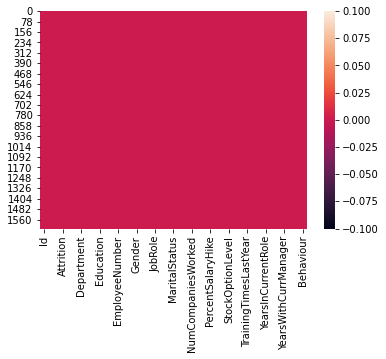

In [13]:
#This checks for missing values 
sns.heatmap(train_df.isnull());

The above plot shows that there are no missing values in our dataset.

<hr>

**Checking for imbalance in the dataset attributes**

**Labels**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


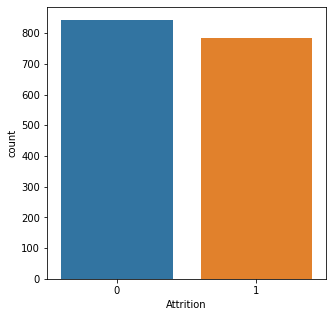

In [14]:
plt.figure(figsize = (5,5))
sns.countplot(train_df.Attrition);

The dataset is almost balanced

**Numerical Data**

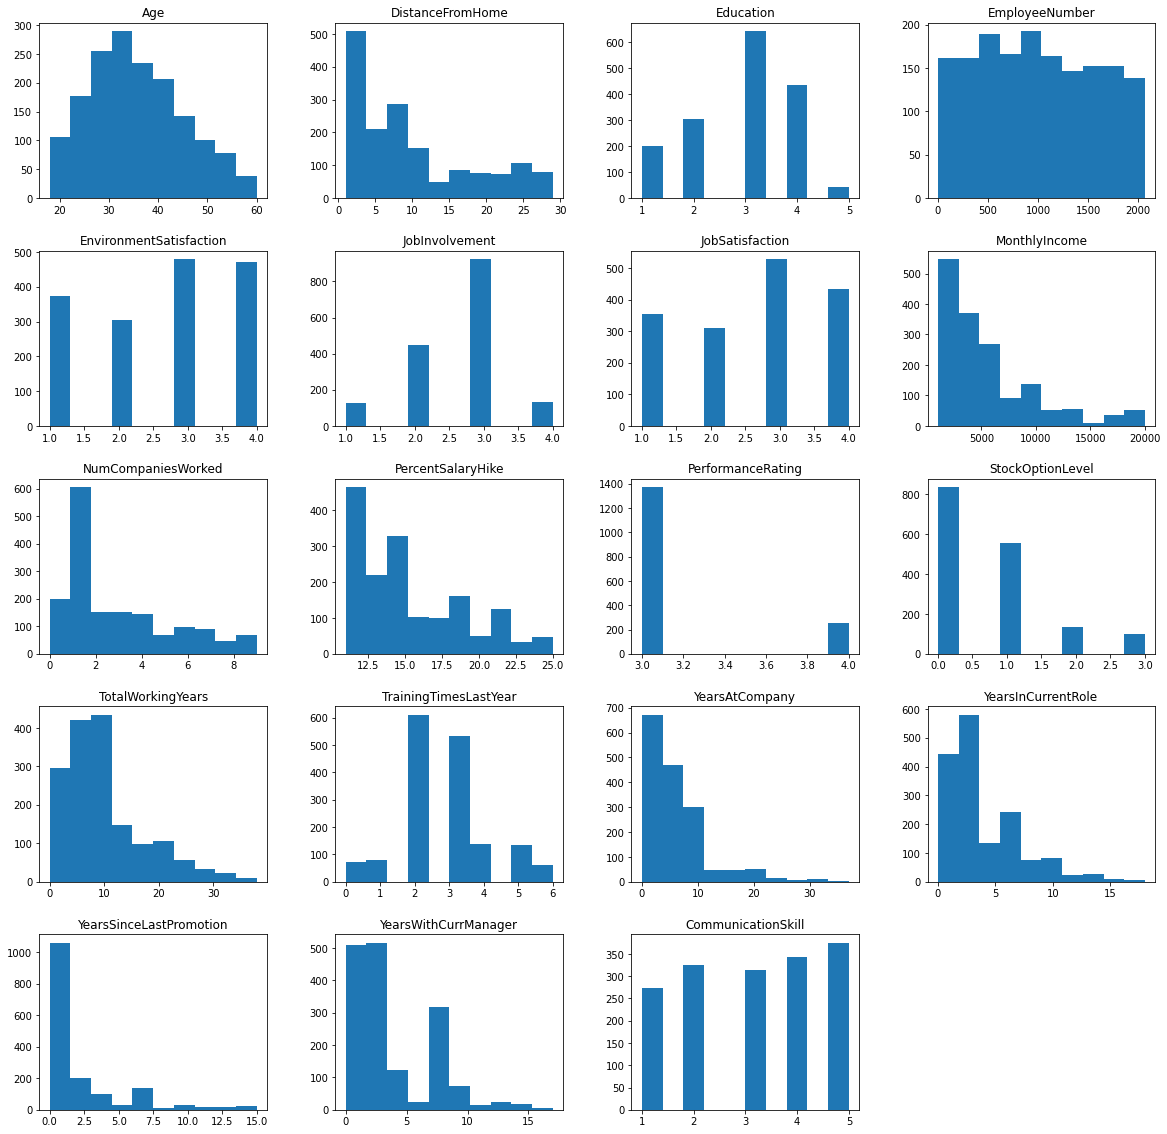

In [15]:
train_features = train_df.drop(['Id','Attrition', 'Behaviour'], axis = 1)
train_features.hist(figsize = (20,20), grid = False);

From the above graphs, we can see that some features like DistanceFromHome and MonthlyIncome are highly skewed. We will take care of these later.

**Categorical Data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

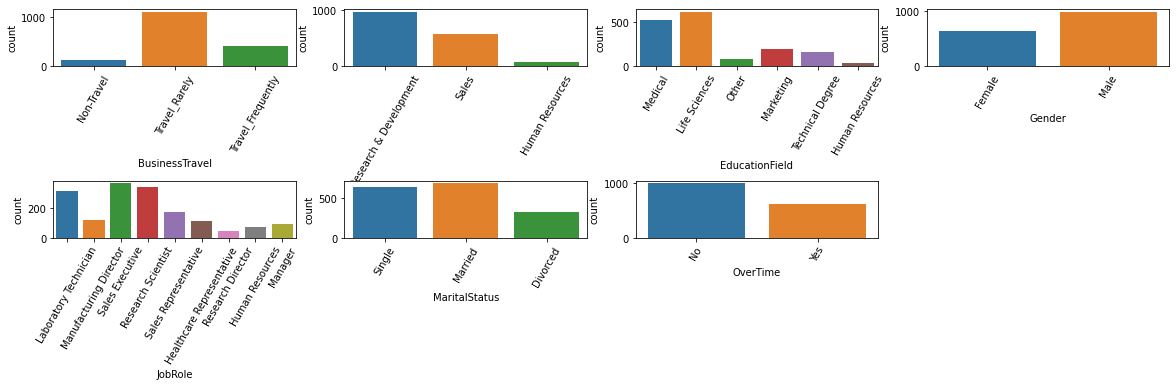

In [16]:
train_categorical = train_features.select_dtypes('object')
plt.figure(figsize = (20, 20))
for _ in range(train_categorical.shape[1]):
    x = train_categorical.iloc[:, _]
    plt.subplot(7, 4, _+1)
    plt.subplots_adjust(hspace=2)
    plt.xticks(rotation=60)
    sns.countplot(x)

<hr>

## Taking Care of the Categorical and Numerical variables

Finding the correlation b/w the variables. Continuous-continuous, categorical-categorical, continuous-categorical. We need to scale the continuous variables before calculating the correlations.

#### Separating the Nominal and Ordinal Categorical features from the dataset

In [17]:
nom_catg_col = list(train_df.select_dtypes(['object']).columns)
nom_catg_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [18]:
ord_catg_col = ["Education", "EnvironmentSatisfaction", "JobInvolvement","JobSatisfaction",
                    "PerformanceRating","StockOptionLevel","CommunicationSkill", "Behaviour"]
ord_catg_col

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobSatisfaction',
 'PerformanceRating',
 'StockOptionLevel',
 'CommunicationSkill',
 'Behaviour']

In [19]:
catg_col_list = nom_catg_col + ord_catg_col
catg_col_df = train_df[catg_col_list]
catg_col_df.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,StockOptionLevel,CommunicationSkill,Behaviour
0,Non-Travel,Research & Development,Medical,Female,Laboratory Technician,Single,No,3,3,3,4,3,0,4,1
1,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Married,Yes,4,3,3,3,3,2,2,1
2,Travel_Rarely,Sales,Medical,Male,Sales Executive,Single,No,1,3,3,4,3,0,5,1
3,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Single,No,1,1,3,4,3,0,4,1
4,Travel_Rarely,Research & Development,Other,Male,Manufacturing Director,Married,No,3,3,3,3,3,1,1,1


<hr>

## One Hot Encoding for the Nominal Variables

The nominal variables, which are 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime' are One Hot Encoded.

In [20]:
df_hot_enc_catg = pd.get_dummies(catg_col_df, columns = nom_catg_col, drop_first = True) #one hot encoding the nominal variables
df_hot_enc_catg.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,StockOptionLevel,CommunicationSkill,Behaviour,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,3,3,3,4,3,0,4,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,4,3,3,3,3,2,2,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
2,1,3,3,4,3,0,5,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,1,1,3,4,3,0,4,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
4,3,3,3,3,3,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0


<hr>

## Scaling the Numerical Variables

In [21]:
num_col_list = list(set(train_df.columns)-set(catg_col_list)-{'Attrition'})
num_col_df = train_df[num_col_list]
num_col_df.head()

,YearsWithCurrManager,MonthlyIncome,Id,PercentSalaryHike,DistanceFromHome,Age,YearsInCurrentRole,TrainingTimesLastYear,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,EmployeeNumber,YearsSinceLastPromotion
0,7,2564,1,14,2,30,7,2,11,12,0,571,6
1,1,4663,2,12,12,36,2,2,3,7,9,1614,1
2,3,5160,3,16,2,55,7,3,9,12,4,842,7
3,7,4108,4,13,24,39,7,2,7,18,7,2014,1
4,8,9434,5,15,3,37,7,2,10,10,1,689,7


Next the dataset is Standardized using MinMaxScalar 

In [22]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
df_min_max_num = pd.DataFrame(scalar.fit_transform(num_col_df), columns = num_col_df.columns)
df_min_max_num.head()

,YearsWithCurrManager,MonthlyIncome,Id,PercentSalaryHike,DistanceFromHome,Age,YearsInCurrentRole,TrainingTimesLastYear,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,EmployeeNumber,YearsSinceLastPromotion
0,0.411765,0.081885,0.000000,0.214286,0.035714,0.285714,0.388889,0.333333,0.297297,0.315789,0.000000,0.275762,0.400000
1,0.058824,0.192417,0.000615,0.071429,0.392857,0.428571,0.111111,0.333333,0.081081,0.184211,1.000000,0.780358,0.066667
2,0.176471,0.218589,0.001229,0.357143,0.035714,0.880952,0.388889,0.500000,0.243243,0.315789,0.444444,0.406870,0.466667
3,0.411765,0.163191,0.001844,0.142857,0.821429,0.500000,0.388889,0.333333,0.189189,0.473684,0.777778,0.973875,0.066667
4,0.470588,0.443655,0.002459,0.285714,0.071429,0.452381,0.388889,0.333333,0.270270,0.263158,0.111111,0.332850,0.466667


<hr>

## Final dataset after One Hot Encoding and Standardization

In [23]:
standar_df = pd.concat([df_hot_enc_catg, df_min_max_num], axis=1)
standar_df.head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,StockOptionLevel,CommunicationSkill,Behaviour,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,YearsWithCurrManager,MonthlyIncome,Id,PercentSalaryHike,DistanceFromHome,Age,YearsInCurrentRole,TrainingTimesLastYear,YearsAtCompany,TotalWorkingYears,NumCompaniesWorked,EmployeeNumber,YearsSinceLastPromotion
0,3,3,3,4,3,0,4,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.411765,0.081885,0.000000,0.214286,0.035714,0.285714,0.388889,0.333333,0.297297,0.315789,0.000000,0.275762,0.400000
1,4,3,3,3,3,2,2,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0.058824,0.192417,0.000615,0.071429,0.392857,0.428571,0.111111,0.333333,0.081081,0.184211,1.000000,0.780358,0.066667
2,1,3,3,4,3,0,5,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0.176471,0.218589,0.001229,0.357143,0.035714,0.880952,0.388889,0.500000,0.243243,0.315789,0.444444,0.406870,0.466667
3,1,1,3,4,3,0,4,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0.411765,0.163191,0.001844,0.142857,0.821429,0.500000,0.388889,0.333333,0.189189,0.473684,0.777778,0.973875,0.066667
4,3,3,3,3,3,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0.470588,0.443655,0.002459,0.285714,0.071429,0.452381,0.388889,0.333333,0.270270,0.263158,0.111111,0.332850,0.466667


In [24]:
standar_df.shape

(1628, 42)

<hr>

# Feature Selection

### Using Extra Tree Classifier

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

features = ExtraTreesClassifier()
features.fit(standar_df, train_df.Attrition)

score = features.feature_importances_
score

array([0.02004596, 0.02687329, 0.02167147, 0.02674014, 0.01038968,
       0.02631901, 0.02446689, 0.        , 0.01718923, 0.01205254,
       0.01218567, 0.01069831, 0.01404847, 0.00791627, 0.01456682,
       0.00462182, 0.01243858, 0.01550662, 0.00408248, 0.01292042,
       0.0059236 , 0.00940461, 0.00573733, 0.00878986, 0.00895777,
       0.01865729, 0.01613394, 0.02430615, 0.07193556, 0.02379396,
       0.02928056, 0.23026435, 0.02221437, 0.02663338, 0.02863431,
       0.03007475, 0.0207509 , 0.02728234, 0.03245435, 0.02057543,
       0.02281336, 0.02064813])

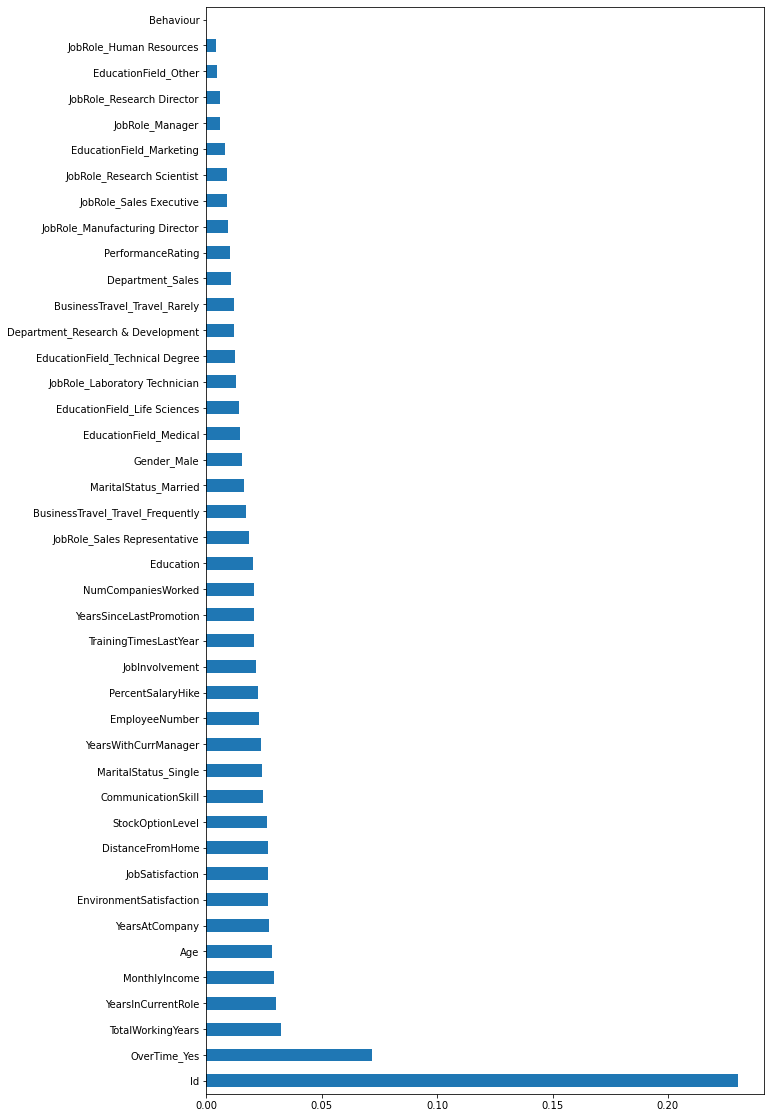

In [26]:
feature_scores = pd.Series(score, index = standar_df.columns).sort_values(ascending = False)
plt.figure(figsize=(10,20))
feature_scores.plot(kind='barh')
plt.show()

In [27]:
feature_scores

Id                                   0.230264
OverTime_Yes                         0.071936
TotalWorkingYears                    0.032454
YearsInCurrentRole                   0.030075
MonthlyIncome                        0.029281
Age                                  0.028634
YearsAtCompany                       0.027282
EnvironmentSatisfaction              0.026873
JobSatisfaction                      0.026740
DistanceFromHome                     0.026633
StockOptionLevel                     0.026319
CommunicationSkill                   0.024467
MaritalStatus_Single                 0.024306
YearsWithCurrManager                 0.023794
EmployeeNumber                       0.022813
PercentSalaryHike                    0.022214
JobInvolvement                       0.021671
TrainingTimesLastYear                0.020751
YearsSinceLastPromotion              0.020648
NumCompaniesWorked                   0.020575
Education                            0.020046
JobRole_Sales Representative      

Select the top 30 features

In [28]:
best_features = list(feature_scores.index[0:30])
best_features

['Id',
 'OverTime_Yes',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'MonthlyIncome',
 'Age',
 'YearsAtCompany',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'DistanceFromHome',
 'StockOptionLevel',
 'CommunicationSkill',
 'MaritalStatus_Single',
 'YearsWithCurrManager',
 'EmployeeNumber',
 'PercentSalaryHike',
 'JobInvolvement',
 'TrainingTimesLastYear',
 'YearsSinceLastPromotion',
 'NumCompaniesWorked',
 'Education',
 'JobRole_Sales Representative',
 'BusinessTravel_Travel_Frequently',
 'MaritalStatus_Married',
 'Gender_Male',
 'EducationField_Medical',
 'EducationField_Life Sciences',
 'JobRole_Laboratory Technician',
 'EducationField_Technical Degree',
 'Department_Research & Development']

### Correlation between the target and features

In [29]:
standar_df[best_features].apply(lambda x: x.corr(train_df.Attrition)).sort_values()

YearsInCurrentRole                  -0.269408
TotalWorkingYears                   -0.262922
MonthlyIncome                       -0.240479
YearsAtCompany                      -0.230061
YearsWithCurrManager                -0.222752
Age                                 -0.200596
StockOptionLevel                    -0.175496
JobInvolvement                      -0.159710
MaritalStatus_Married               -0.157919
JobSatisfaction                     -0.148012
Department_Research & Development   -0.143262
EnvironmentSatisfaction             -0.111746
TrainingTimesLastYear               -0.105663
EducationField_Life Sciences        -0.064247
EmployeeNumber                      -0.051512
YearsSinceLastPromotion             -0.050379
EducationField_Medical              -0.042741
Education                           -0.041390
PercentSalaryHike                   -0.012668
Gender_Male                          0.024573
NumCompaniesWorked                   0.034763
EducationField_Technical Degree   

I left the features as selected above since the correlation between the features and target variable is above 0.01. 
It's surprising that for Id the correlation is >0.69. Still, it should be dropped.

In [30]:
top_feat_df = standar_df[best_features].drop(['Id'], axis = 1)
top_feat_df.head()

,OverTime_Yes,TotalWorkingYears,YearsInCurrentRole,MonthlyIncome,Age,YearsAtCompany,EnvironmentSatisfaction,JobSatisfaction,DistanceFromHome,StockOptionLevel,CommunicationSkill,MaritalStatus_Single,YearsWithCurrManager,EmployeeNumber,PercentSalaryHike,JobInvolvement,TrainingTimesLastYear,YearsSinceLastPromotion,NumCompaniesWorked,Education,JobRole_Sales Representative,BusinessTravel_Travel_Frequently,MaritalStatus_Married,Gender_Male,EducationField_Medical,EducationField_Life Sciences,JobRole_Laboratory Technician,EducationField_Technical Degree,Department_Research & Development
0,0,0.315789,0.388889,0.081885,0.285714,0.297297,3,4,0.035714,0,4,1,0.411765,0.275762,0.214286,3,0.333333,0.400000,0.000000,3,0,0,0,0,1,0,1,0,1
1,1,0.184211,0.111111,0.192417,0.428571,0.081081,3,3,0.392857,2,2,0,0.058824,0.780358,0.071429,3,0.333333,0.066667,1.000000,4,0,0,1,0,0,1,0,0,1
2,0,0.315789,0.388889,0.218589,0.880952,0.243243,3,4,0.035714,0,5,1,0.176471,0.406870,0.357143,3,0.500000,0.466667,0.444444,1,0,0,0,1,1,0,0,0,0
3,0,0.473684,0.388889,0.163191,0.500000,0.189189,1,4,0.821429,0,4,1,0.411765,0.973875,0.142857,3,0.333333,0.066667,0.777778,1,0,0,0,1,0,1,0,0,1
4,0,0.263158,0.388889,0.443655,0.452381,0.270270,3,3,0.071429,1,1,0,0.470588,0.332850,0.285714,3,0.333333,0.466667,0.111111,3,0,0,1,1,0,0,0,0,1


<hr>

## Taking care of the skewed features

# 
To check for skewness in the data and apply the required transformation, I plotted the graph of the original data along with Square Root transformed and Log Transformed

# Model Building

In [31]:
X = top_feat_df
y = train_df.Attrition

In [32]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=4)

# Logistic Regression

# 
The first model I tried is Logistic Regression. I used RandomizedSearchCV to get the best parameters. The accuracy score is around 77%.

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [34]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
param_dist = {'C':list(range(1, 5)),
              'random_state':list(range(0,5)),
              'max_iter':[50, 100, 150, 200, 250]}
log_search = RandomizedSearchCV(logModel, param_distributions=param_dist, n_iter=50)
log_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [1, 2, 3, 4],
                                        'max_iter': [50, 100, 150, 200, 250],
                                        'random_state': [0, 1, 2, 3, 4]},
                   pre_dispatch='2*n_jobs', random_state=None, refi

In [35]:
pred = log_search.predict(X_val)
accuracy_score(y_val, pred)

0.7732342007434945

# SVC

In [36]:
from sklearn.svm import SVC
svcModel = SVC(gamma="auto")
svcModel.fit(X_train, y_train)
pred = svcModel.predict(X_val)
accuracy_score(y_val, pred)

0.8048327137546468